In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
#import os
#import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
pwd

'/Users/peien/NYU Langone Health Dropbox/Peien Jiang/121_v_129_for_Itai'

In [4]:
pamA_m6A = pd.read_csv('pamA_m6A_raw.csv', index_col=0)
pamA_m6A

,seqid,source,type,start,end,score,strand,phase,coverage,context,IPDRatio,identificationQv,coord,dir_new
1,ctg.s1.000000F,kinModCall,m6A,105,105,1013,+,.,628,CGCGCTAATAAAGAGGCACGATCAATCGCATGATAAAACTC,4.71,993,3010.0,-
2,ctg.s1.000000F,kinModCall,m6A,106,106,1487,-,.,653,GGAGTTTTATCATGCGATTGATCGTGCCTCTTTATTAGCGC,5.82,1518,3009.0,+
3,ctg.s1.000000F,kinModCall,m6A,558,558,1530,+,.,645,CTAGAAACTTGAGGTAATAAAGGATATTGATCTGGATCTAA,5.50,1527,2557.0,-
4,ctg.s1.000000F,kinModCall,m6A,567,567,1240,+,.,645,TGAGGTAATAAAGGATATTGATCTGGATCTAAGCCACTTAA,5.09,1260,2548.0,-
5,ctg.s1.000000F,kinModCall,m6A,568,568,1255,-,.,661,TTTAAGTGGCTTAGATCCAGATCAATATCCTTTATTACCTC,4.94,1228,2547.0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13821,ctg.s1.000000F,kinModCall,m6A,2865636,2865636,1201,-,.,657,GACATCTGTAGATGGTATTGATCATGAAATCATGAATAACG,5.32,1239,4990.0,+
13822,ctg.s1.000000F,kinModCall,m6A,2866434,2866434,1319,+,.,656,TACCTTTTTTAGTTATAAACATTGTTAATGGCATCGTGCCG,4.99,1284,4192.0,-
13823,ctg.s1.000000F,kinModCall,m6A,2866442,2866442,975,-,.,646,TATAGACACGGCACGATGCCATTAACAATGTTTATAACTAA,4.38,970,4184.0,+
13824,ctg.s1.000000F,kinModCall,m6A,2866753,2866753,969,+,.,651,AATTCTGGGATATCTATACGATCTTGATGTTCTAACTTTTT,4.56,940,3873.0,-


In [5]:
EV_m6A = pd.read_csv('EV_m6A_raw.csv', index_col=0)
EV_m6A

,seqid,source,type,start,end,score,strand,phase,coverage,context,IPDRatio,identificationQv,coord,dir_new
1,ctg.s1.000000F,kinModCall,m6A,3,3,88,-,.,643,GCTTGAAATTGCTCAAGAAAAATNNNNNNNNNNNNNNNNNN,1.59,146,593,+
2,ctg.s1.000000F,kinModCall,m6A,4112,4112,1533,+,.,659,TCTGGTTATGAAGAAGCAGCAGGACAAGGATTGATGGCAGG,5.42,1515,2863304,-
3,ctg.s1.000000F,kinModCall,m6A,4122,4122,1411,-,.,632,AGCGTTAATACCTGCCATCAATCCTTGTCCTGCTGCTTCTT,5.09,1416,2863294,+
4,ctg.s1.000000F,kinModCall,m6A,6257,6257,25,+,.,653,AAAAGCTAAATGTGAAACAGACTGAAGATAGAGTACGCCAA,1.36,47,2861159,-
5,ctg.s1.000000F,kinModCall,m6A,6482,6482,24,+,.,664,AGGATGTCGTATACATGATGACTAACACATAAAAGACAAAG,1.30,4,2860934,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,ctg.s1.000000F,kinModCall,m6A,2863224,2863224,1257,+,.,634,TACCTTTTTTAGTTATAAACATTGTTAATGGCATCGTGCCG,4.84,1219,4192,-
3574,ctg.s1.000000F,kinModCall,m6A,2863232,2863232,983,-,.,649,TATAGACACGGCACGATGCCATTAACAATGTTTATAACTAA,4.42,975,4184,+
3575,ctg.s1.000000F,kinModCall,m6A,2864859,2864859,1565,+,.,636,CTAGAAACTTGAGGTAATAAAGGATATTGATCTGGATCTAA,5.70,1511,2557,-
3576,ctg.s1.000000F,kinModCall,m6A,2864869,2864869,1245,-,.,650,TTTAAGTGGCTTAGATCCAGATCAATATCCTTTATTACCTC,4.93,1222,2547,+


# Add gene annotations

In [9]:
ls

20230310_PacBio_RU121_LAC-pamA/ RU121vs129.ipynb
20230310_PacBio_RU129_LAC-EV/   RU129_roated_3017gene.gff
EV_m4C.csv                      __MACOSX/
EV_m4C_raw.csv                  pamA_m4C.csv
EV_m6A.csv                      pamA_m4C_raw.csv
EV_m6A_raw.csv                  pamA_m6A.csv
RU121_129.Rmd                   pamA_m6A_raw.csv
RU121_roated_3017gene.gff


In [18]:
pamA_gff = pd.read_csv('/Users/peien/NYU Langone Health Dropbox/Peien Jiang/121_v_129_for_Itai/pamA_gff.csv',index_col=0)
pamA_gff

,seqid,source,type,start,end,score,strand,phase,ID,coverage,sequence_ID,extra_copy_number,copy_num_ID
1,ctg.s1.000000F,Liftoff,gene,544,1905,.,+,.,SAUSA300_RS00010,1.0,1.000,0,SAUSA300_RS00010_0
2,ctg.s1.000000F,Liftoff,gene,2183,3316,.,+,.,SAUSA300_RS00015,1.0,1.000,0,SAUSA300_RS00015_0
3,ctg.s1.000000F,Liftoff,gene,3697,3942,.,+,.,SAUSA300_RS00020,1.0,1.000,0,SAUSA300_RS00020_0
4,ctg.s1.000000F,Liftoff,gene,3939,5051,.,+,.,SAUSA300_RS00025,1.0,0.999,0,SAUSA300_RS00025_0
5,ctg.s1.000000F,Liftoff,gene,5061,6995,.,+,.,SAUSA300_RS00030,1.0,1.000,0,SAUSA300_RS00030_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,ctg.s1.000000F,Liftoff,gene,2862532,2863251,.,-,.,SAUSA300_RS14680,1.0,1.000,0,SAUSA300_RS14680_0
2985,ctg.s1.000000F,Liftoff,gene,2863251,2865128,.,-,.,SAUSA300_RS14685,1.0,1.000,0,SAUSA300_RS14685_0
2986,ctg.s1.000000F,Liftoff,gene,2865195,2866574,.,-,.,SAUSA300_RS14690,1.0,1.000,0,SAUSA300_RS14690_0
2987,ctg.s1.000000F,Liftoff,gene,2866713,2867066,.,-,.,SAUSA300_RS14695,1.0,1.000,0,SAUSA300_RS14695_0


In [19]:
EV_gff = pd.read_csv('/Users/peien/NYU Langone Health Dropbox/Peien Jiang/121_v_129_for_Itai/EV_gff.csv',index_col=0)
EV_gff

,seqid,source,type,start,end,score,strand,phase,ID,coverage,sequence_ID,extra_copy_number,copy_num_ID
1,ctg.s1.000000F,Liftoff,gene,544,1905,.,+,.,SAUSA300_RS00010,1.0,1.000,0,SAUSA300_RS00010_0
2,ctg.s1.000000F,Liftoff,gene,2183,3316,.,+,.,SAUSA300_RS00015,1.0,1.000,0,SAUSA300_RS00015_0
3,ctg.s1.000000F,Liftoff,gene,3697,3942,.,+,.,SAUSA300_RS00020,1.0,1.000,0,SAUSA300_RS00020_0
4,ctg.s1.000000F,Liftoff,gene,3939,5051,.,+,.,SAUSA300_RS00025,1.0,0.999,0,SAUSA300_RS00025_0
5,ctg.s1.000000F,Liftoff,gene,5061,6995,.,+,.,SAUSA300_RS00030,1.0,1.000,0,SAUSA300_RS00030_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,ctg.s1.000000F,Liftoff,gene,2861841,2862560,.,-,.,SAUSA300_RS14680,1.0,1.000,0,SAUSA300_RS14680_0
2985,ctg.s1.000000F,Liftoff,gene,2862560,2864437,.,-,.,SAUSA300_RS14685,1.0,1.000,0,SAUSA300_RS14685_0
2986,ctg.s1.000000F,Liftoff,gene,2864504,2865883,.,-,.,SAUSA300_RS14690,1.0,1.000,0,SAUSA300_RS14690_0
2987,ctg.s1.000000F,Liftoff,gene,2866022,2866375,.,-,.,SAUSA300_RS14695,1.0,1.000,0,SAUSA300_RS14695_0


In [20]:
pamA_gff=pamA_gff.sort_values(by=['start'])
EV_gff=EV_gff.sort_values(by=['start']) 

In [21]:
from bisect import bisect_left, bisect_right
# Function to find closest gene
def find_closest_tu(gff, pos, strand):
    same_strand_tu = gff[gff['strand'] == strand]
    
    # First, find if the position is within a gene
    for _, tu in same_strand_tu.iterrows():
        if tu['start'] <= pos <= tu['end']:
            return pd.Series([tu['ID'], tu['start'], tu['end']])
    
    # If not found within a gene, find the closest next one
    if strand == '+':
        tu_starts = same_strand_tu['start'].tolist()
        position = bisect_left(tu_starts, pos)
        
        # If pos is greater than any transcription start
        if position == len(tu_starts):
            # Return the first tu in circular DNA
            tu = same_strand_tu.iloc[0]
        else:
            # The transcription unit starting at or after the position
            tu = same_strand_tu.iloc[position]
        return pd.Series([tu['ID'], tu['start'], tu['end']])
    else:  # If strand is "-"
        tu_ends = same_strand_tu['end'].tolist()
        position = bisect_right(tu_ends, pos)
        
        # If pos is smaller than any transcription end
        if position == 0:
            # Return the last tu in circular DNA
            tu = same_strand_tu.iloc[-1]
        else:
            # The transcription unit ending at or before the position
            tu = same_strand_tu.iloc[position-1]
        return pd.Series([tu['ID'], tu['start'], tu['end']])


In [26]:
# Apply function to pamA_m6A dataframe
pamA_m6A[['gene_ID', 'gene_start', 'gene_end']] = pamA_m6A.apply(lambda row: find_closest_tu(pamA_gff,row['coord'], row['dir_new']), axis=1)
pamA_m6A

,seqid,source,type,start,end,score,strand,phase,coverage,context,IPDRatio,identificationQv,coord,dir_new,gene_ID,gene_start,gene_end
1,ctg.s1.000000F,kinModCall,m6A,105,105,1013,+,.,628,CGCGCTAATAAAGAGGCACGATCAATCGCATGATAAAACTC,4.71,993,3010.0,-,SAUSA300_RS14700,2867187,2867324
2,ctg.s1.000000F,kinModCall,m6A,106,106,1487,-,.,653,GGAGTTTTATCATGCGATTGATCGTGCCTCTTTATTAGCGC,5.82,1518,3009.0,+,SAUSA300_RS00015,2183,3316
3,ctg.s1.000000F,kinModCall,m6A,558,558,1530,+,.,645,CTAGAAACTTGAGGTAATAAAGGATATTGATCTGGATCTAA,5.50,1527,2557.0,-,SAUSA300_RS14700,2867187,2867324
4,ctg.s1.000000F,kinModCall,m6A,567,567,1240,+,.,645,TGAGGTAATAAAGGATATTGATCTGGATCTAAGCCACTTAA,5.09,1260,2548.0,-,SAUSA300_RS14700,2867187,2867324
5,ctg.s1.000000F,kinModCall,m6A,568,568,1255,-,.,661,TTTAAGTGGCTTAGATCCAGATCAATATCCTTTATTACCTC,4.94,1228,2547.0,+,SAUSA300_RS00015,2183,3316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13821,ctg.s1.000000F,kinModCall,m6A,2865636,2865636,1201,-,.,657,GACATCTGTAGATGGTATTGATCATGAAATCATGAATAACG,5.32,1239,4990.0,+,SAUSA300_RS00025,3939,5051
13822,ctg.s1.000000F,kinModCall,m6A,2866434,2866434,1319,+,.,656,TACCTTTTTTAGTTATAAACATTGTTAATGGCATCGTGCCG,4.99,1284,4192.0,-,SAUSA300_RS14700,2867187,2867324
13823,ctg.s1.000000F,kinModCall,m6A,2866442,2866442,975,-,.,646,TATAGACACGGCACGATGCCATTAACAATGTTTATAACTAA,4.38,970,4184.0,+,SAUSA300_RS00025,3939,5051
13824,ctg.s1.000000F,kinModCall,m6A,2866753,2866753,969,+,.,651,AATTCTGGGATATCTATACGATCTTGATGTTCTAACTTTTT,4.56,940,3873.0,-,SAUSA300_RS14700,2867187,2867324


In [29]:
pamA_m6A['strand'].value_counts()

-    6916
+    6909
Name: strand, dtype: int64

In [28]:
pamA_gff

,seqid,source,type,start,end,score,strand,phase,ID,coverage,sequence_ID,extra_copy_number,copy_num_ID
1,ctg.s1.000000F,Liftoff,gene,544,1905,.,+,.,SAUSA300_RS00010,1.0,1.000,0,SAUSA300_RS00010_0
2,ctg.s1.000000F,Liftoff,gene,2183,3316,.,+,.,SAUSA300_RS00015,1.0,1.000,0,SAUSA300_RS00015_0
3,ctg.s1.000000F,Liftoff,gene,3697,3942,.,+,.,SAUSA300_RS00020,1.0,1.000,0,SAUSA300_RS00020_0
4,ctg.s1.000000F,Liftoff,gene,3939,5051,.,+,.,SAUSA300_RS00025,1.0,0.999,0,SAUSA300_RS00025_0
5,ctg.s1.000000F,Liftoff,gene,5061,6995,.,+,.,SAUSA300_RS00030,1.0,1.000,0,SAUSA300_RS00030_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,ctg.s1.000000F,Liftoff,gene,2862532,2863251,.,-,.,SAUSA300_RS14680,1.0,1.000,0,SAUSA300_RS14680_0
2985,ctg.s1.000000F,Liftoff,gene,2863251,2865128,.,-,.,SAUSA300_RS14685,1.0,1.000,0,SAUSA300_RS14685_0
2986,ctg.s1.000000F,Liftoff,gene,2865195,2866574,.,-,.,SAUSA300_RS14690,1.0,1.000,0,SAUSA300_RS14690_0
2987,ctg.s1.000000F,Liftoff,gene,2866713,2867066,.,-,.,SAUSA300_RS14695,1.0,1.000,0,SAUSA300_RS14695_0


In [27]:
# Apply function to EV_m6A dataframe
EV_m6A[['gene_ID', 'gene_start', 'gene_end']] = EV_m6A.apply(lambda row: find_closest_tu(EV_gff,row['coord'], row['dir_new']), axis=1)
EV_m6A

,seqid,source,type,start,end,score,strand,phase,coverage,context,IPDRatio,identificationQv,coord,dir_new,gene_ID,gene_start,gene_end,dist
1,ctg.s1.000000F,kinModCall,m6A,3,3,88,-,.,643,GCTTGAAATTGCTCAAGAAAAATNNNNNNNNNNNNNNNNNN,1.59,146,593,+,SAUSA300_RS00010,544,1905,2866630
2,ctg.s1.000000F,kinModCall,m6A,4112,4112,1533,+,.,659,TCTGGTTATGAAGAAGCAGCAGGACAAGGATTGATGGCAGG,5.42,1515,2863304,-,SAUSA300_RS14685,2862560,2864437,173
3,ctg.s1.000000F,kinModCall,m6A,4122,4122,1411,-,.,632,AGCGTTAATACCTGCCATCAATCCTTGTCCTGCTGCTTCTT,5.09,1416,2863294,+,SAUSA300_RS00010,544,1905,2862511
4,ctg.s1.000000F,kinModCall,m6A,6257,6257,25,+,.,653,AAAAGCTAAATGTGAAACAGACTGAAGATAGAGTACGCCAA,1.36,47,2861159,-,SAUSA300_RS14675,2860959,2861798,1196
5,ctg.s1.000000F,kinModCall,m6A,6482,6482,24,+,.,664,AGGATGTCGTATACATGATGACTAACACATAAAAGACAAAG,1.30,4,2860934,-,SAUSA300_RS14670,2860153,2860506,1421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,ctg.s1.000000F,kinModCall,m6A,2863224,2863224,1257,+,.,634,TACCTTTTTTAGTTATAAACATTGTTAATGGCATCGTGCCG,4.84,1219,4192,-,SAUSA300_RS14700,2866496,2866633,2862680
3574,ctg.s1.000000F,kinModCall,m6A,2863232,2863232,983,-,.,649,TATAGACACGGCACGATGCCATTAACAATGTTTATAACTAA,4.42,975,4184,+,SAUSA300_RS00025,3939,5051,1205
3575,ctg.s1.000000F,kinModCall,m6A,2864859,2864859,1565,+,.,636,CTAGAAACTTGAGGTAATAAAGGATATTGATCTGGATCTAA,5.70,1511,2557,-,SAUSA300_RS14700,2866496,2866633,2864315
3576,ctg.s1.000000F,kinModCall,m6A,2864869,2864869,1245,-,.,650,TTTAAGTGGCTTAGATCCAGATCAATATCCTTTATTACCTC,4.93,1222,2547,+,SAUSA300_RS00015,2183,3316,1014


In [40]:
pamA_m6A.to_csv('pamA_m6A_with_genes.csv')
EV_m6A.to_csv('EV_m6A_with_genes.csv')

Merge the pamA and EV together

In [52]:
# 1) keep only what we need + rename ipd columns
pam = (pamA_m6A[['gene_ID', 'dist', 'dir_new', 'coord','IPDRatio']]
       .rename(columns={'IPDRatio': 'pamA_ipd', 'coord': 'pamA_coord'}))

ev  = (EV_m6A[['gene_ID', 'dist', 'dir_new', 'coord','IPDRatio']]
       .rename(columns={'IPDRatio': 'EV_ipd', 'coord': 'EV_coord'}))

# 2) outer merge to keep all rows from both
merged = pam.merge(
    ev,
    on=['gene_ID', 'dist', 'dir_new'],   # merge "in terms of gene_ID and dist" + keep dist aligned too
    how='outer'
)

# 3) keep requested columns + fill missing ipd with 1
merged = merged[['gene_ID', 'dist','dir_new',  'pamA_coord', 'EV_coord','pamA_ipd','EV_ipd',]].copy()
merged[['pamA_ipd', 'EV_ipd']] = merged[['pamA_ipd', 'EV_ipd']].fillna(1)

merged

,gene_ID,dist,dir_new,pamA_coord,EV_coord,pamA_ipd,EV_ipd
0,SAUSA300_RS14700,-3197.0,-,3010.0,NaN,4.71,1.00
1,SAUSA300_RS00015,826.0,+,3009.0,NaN,5.82,1.00
2,SAUSA300_RS14700,-2744.0,-,2557.0,2557.0,5.50,5.70
3,SAUSA300_RS14700,-2735.0,-,2548.0,NaN,5.09,1.00
4,SAUSA300_RS00015,364.0,+,2547.0,2547.0,4.94,4.93
...,...,...,...,...,...,...,...
14055,SAUSA300_RS00300,-205.0,-,NaN,67133.0,1.00,1.62
14056,SAUSA300_RS00270,113.0,-,NaN,62421.0,1.00,1.42
14057,SAUSA300_RS00145,105.0,-,NaN,36446.0,1.00,1.43
14058,SAUSA300_RS00085,1307.0,+,NaN,22094.0,1.00,1.37


In [57]:
merged['pamA_coord'].isnull().sum()

235

In [58]:
merged['EV_coord'].isnull().sum()

10483

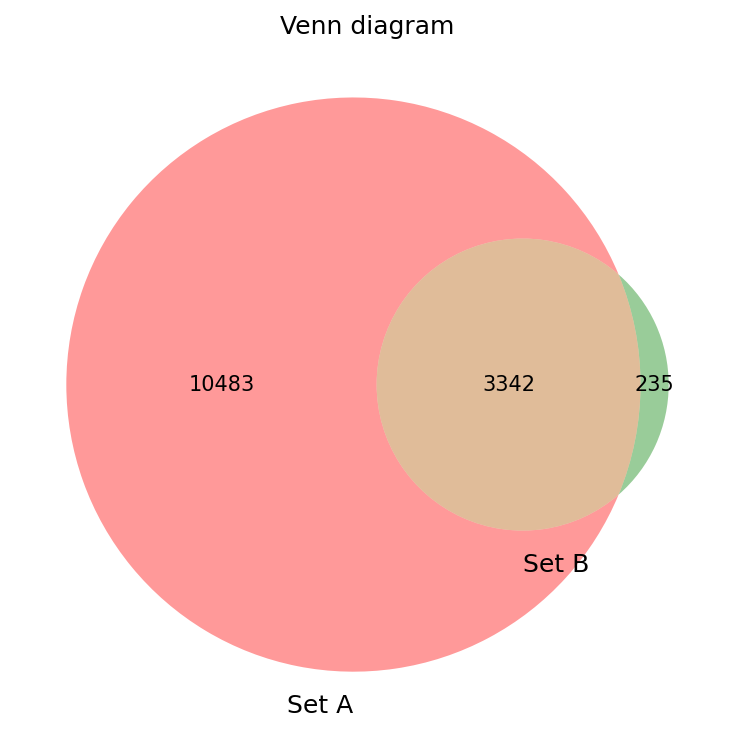

In [151]:
from matplotlib_venn import venn2

A_only = 10483
B_only = 235
A_and_B = 3342

plt.figure(figsize=(5, 5), dpi=150)
venn2(subsets=(A_only, B_only, A_and_B),
      set_labels=('Set A', 'Set B'))
plt.title("Venn diagram")
plt.tight_layout()
plt.savefig("pamA_EV_m6A_venn.pdf")
plt.show()

<Axes: >

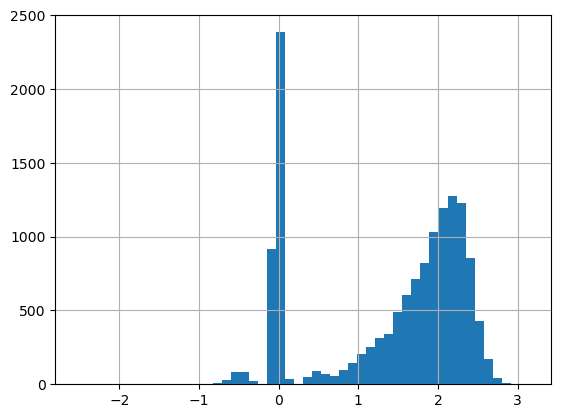

In [62]:
merged['log2FC'] = np.log2(merged['pamA_ipd'] / merged['EV_ipd'])
merged['log2FC'].hist(bins=50)

Look at the overall pattern

In [ ]:
#pamA_gff: pyrE 1211411	1212022 the final gene in the pyr operon
merged[(merged['pamA_coord']<1212022) & (merged['pamA_coord']>1202088)]

,gene_ID,dist,dir_new,pamA_coord,EV_coord,pamA_ipd,EV_ipd,log2FC
7976,SAUSA300_RS05900,-12026.0,-,1211792.0,NaN,3.35,1.00,1.744161
7977,SAUSA300_RS05950,380.0,+,1211791.0,NaN,1.88,1.00,0.910733
7978,SAUSA300_RS05900,-11195.0,-,1210961.0,NaN,2.25,1.00,1.169925
7979,SAUSA300_RS05945,241.0,+,1210960.0,NaN,4.00,1.00,2.000000
7980,SAUSA300_RS05900,-10471.0,-,1210237.0,NaN,3.44,1.00,1.782409
7981,SAUSA300_RS05940,2800.0,+,1210236.0,NaN,1.84,1.00,0.879706
7982,SAUSA300_RS05940,2011.0,+,1209447.0,1208756.0,1.58,1.56,0.018379
7983,SAUSA300_RS05900,-8917.0,-,1208683.0,NaN,4.40,1.00,2.137504
7984,SAUSA300_RS05940,1246.0,+,1208682.0,NaN,4.70,1.00,2.232661
7985,SAUSA300_RS05900,-8864.0,-,1208630.0,NaN,3.74,1.00,1.903038


In [164]:
merged['coord']=np.where(merged['pamA_coord'].isnull(), merged['EV_coord'], merged['pamA_coord'])

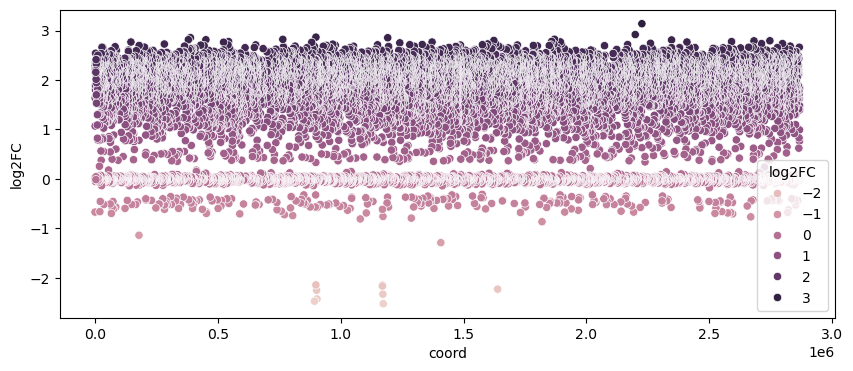

In [185]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=merged,
                y='log2FC',
                hue='log2FC',
                x='coord',
                )
plt.savefig("m6A_log2FC_pamA_EV_genome.pdf")

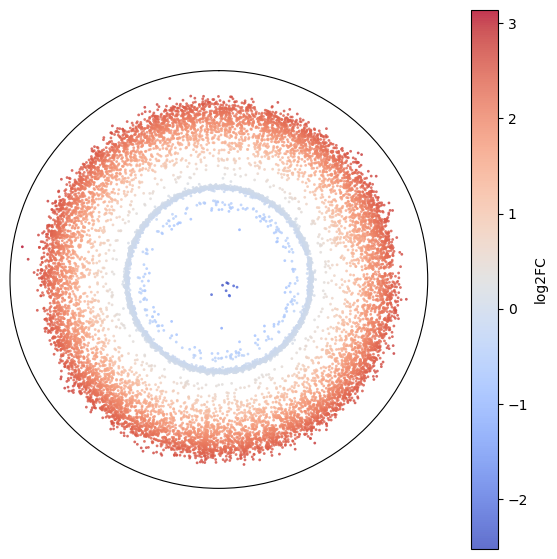

In [189]:
df = merged.dropna(subset=["coord", "log2FC"]).copy()

# genome length (pick one)
L = df["coord"].max()          # or set your known chromosome length explicitly

# angle around the circle
theta = 2 * np.pi * (df["coord"] % L) / L

# radius: shift so it's >= 0
r = df["log2FC"].to_numpy()
r = r - r.min() + 0.2          # +0.2 just adds a little inner margin

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="polar")

sc = ax.scatter(
    theta, r,
    c=df["log2FC"],
    cmap="coolwarm",
    s=4,                        # marker size (increase/decrease)
    alpha=0.8,
    linewidths=0
)

ax.set_theta_zero_location("N")  # start at top
ax.set_theta_direction(-1)       # clockwise
ax.set_xticks([])                # hide angle ticks (optional)
ax.set_yticks([])                # hide radius ticks (optional)

cbar = plt.colorbar(sc, ax=ax, pad=0.08)
cbar.set_label("log2FC")
plt.savefig("m6A_log2FC_pamA_EV_circular_genome.pdf", bbox_inches="tight")
plt.show()